# Compute the network given the adjacency matrix

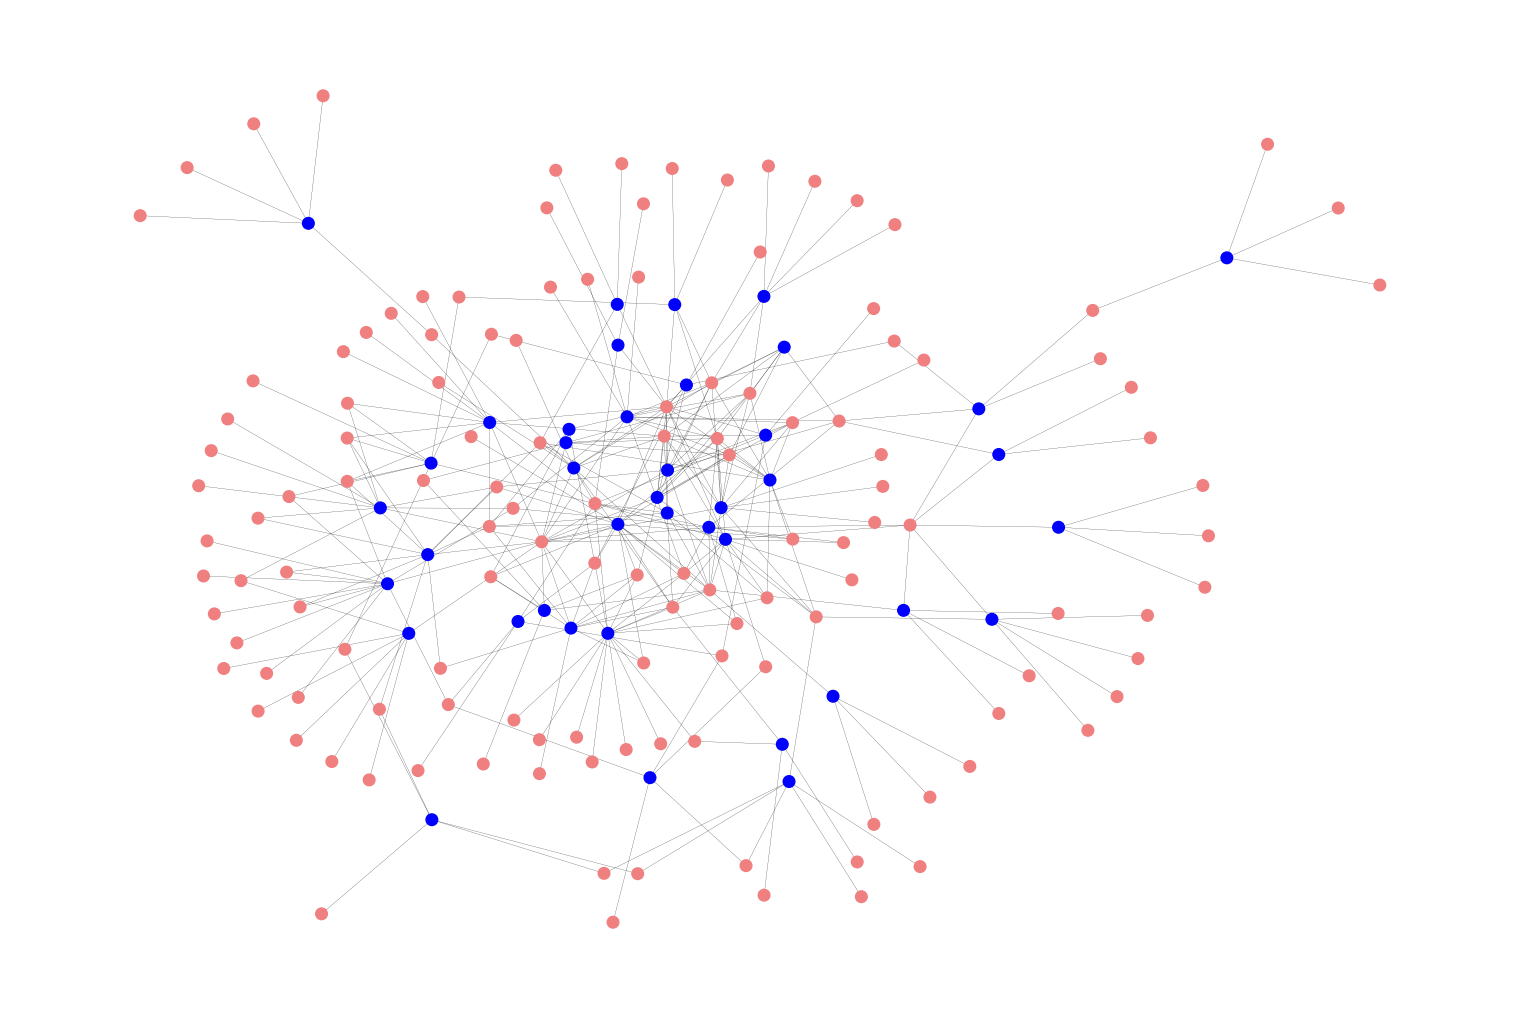

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../dataset/adjacency_matrix.csv").values
adjacency_matrix = adjacency_matrix[:, :-1]  # Remove the last column

# Create a bipartite graph
G = nx.Graph()

# Add nodes to the graph
num_rows, num_cols = adjacency_matrix.shape
G.add_nodes_from(range(num_rows), bipartite=0)  # Nodes in the first partition
G.add_nodes_from(
    range(num_rows, num_rows + num_cols), bipartite=1
)  # Nodes in the second partition

# Add edges to the graph based on the adjacency matrix
for i in range(num_rows):
    for j in range(num_cols):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, num_rows + j)

# Calculate Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Try different layouts

# pos = nx.circular_layout(G)
# pos = nx.random_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.fruchterman_reingold_layout(G)


# Draw the bipartite graph
plt.figure(figsize=(15, 10))  # Adjust the figure size

nx.draw(
    G,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color=["blue" if n in range(num_rows) else "lightcoral" for n in G.nodes],
)
plt.show()

## Compute the Hidalgo Hausmann algorithm 

In [2]:
from scripts.hid_haus import hid_hous

[kd,ks]= hid_hous(adjacency_matrix, 2)
